In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('salary_data_cleaned.csv')

In [3]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,company_txt,job_state,same_state,age,python_yn,R_yn,spark,aws,excel
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,72.0,Tecolote Research\n,NM,0,47,1,0,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,87.5,University of Maryland Medical System\n,MD,0,36,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,85.0,KnowBe4\n,FL,1,10,1,0,1,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,76.5,PNNL\n,WA,1,55,1,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,114.5,Affinity Solutions\n,NY,1,22,1,0,0,0,1


In [4]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel'],
      dtype='object')

In [5]:
df.shape

(742, 28)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          742 non-null    object 
 1   Salary Estimate    742 non-null    object 
 2   Job Description    742 non-null    object 
 3   Rating             742 non-null    float64
 4   Company Name       742 non-null    object 
 5   Location           742 non-null    object 
 6   Headquarters       742 non-null    object 
 7   Size               742 non-null    object 
 8   Founded            742 non-null    int64  
 9   Type of ownership  742 non-null    object 
 10  Industry           742 non-null    object 
 11  Sector             742 non-null    object 
 12  Revenue            742 non-null    object 
 13  Competitors        742 non-null    object 
 14  hourly             742 non-null    int64  
 15  employer_provided  742 non-null    int64  
 16  min_salary         742 non

In [7]:
df[["Salary Estimate","Revenue"]].describe()

,Salary Estimate,Revenue
count,742,742
unique,416,14
top,$54K-$115K (Glassdoor est.),Unknown / Non-Applicable
freq,6,203


In [8]:
df["Job Title"].unique()

array(['Data Scientist', 'Healthcare Data Scientist',
       'Research Scientist', 'Staff Data Scientist - Technology',
       'Data Analyst', 'Data Engineer I', 'Scientist I/II, Biology',
       'Customer Data Scientist',
       'Data Scientist - Health Data Analytics',
       'Senior Data Scientist / Machine Learning',
       'Data Scientist - Quantitative', 'Digital Health Data Scientist',
       'Associate Data Analyst', 'Clinical Data Scientist',
       'Data Scientist / Machine Learning Expert', 'Web Data Analyst',
       'Senior Data Scientist', 'Data Engineer',
       'Data Scientist - Algorithms & Inference', 'Scientist',
       'Lead Data Scientist', 'Spectral Scientist/Engineer',
       'College Hire - Data Scientist - Open to December 2019 Graduates',
       'Data Scientist, Office of Data Science', 'Data Science Analyst',
       'Senior Risk Data Scientist',
       'Data Scientist in Artificial Intelligence Early Career',
       'Data Scientist - Research', 'R&D Data Analy

In [9]:
df["Job Title"].value_counts().head(10)

Data Scientist               131
Data Engineer                 53
Senior Data Scientist         34
Data Analyst                  15
Senior Data Engineer          14
Senior Data Analyst           12
Lead Data Scientist            8
Marketing Data Analyst         6
Sr. Data Engineer              6
Machine Learning Engineer      5
Name: Job Title, dtype: int64

In [10]:
df["Job Title"].head()

0               Data Scientist
1    Healthcare Data Scientist
2               Data Scientist
3               Data Scientist
4               Data Scientist
Name: Job Title, dtype: object

In [11]:
def title_simplifier(title):
    if "data scientist" in title.lower():
        return "data scientist"
    elif "data engineer" in title.lower():
        return "data engineer"
    elif "analyst" in title.lower():
        return "analyst"
    elif "machine learning" in title.lower():
        return "mle"
    elif "director" in title.lower():
        return "director"
    elif "manager" in title.lower():
        return "manager"
    else:
        return "na"
    
    
    
def seniority(title):
    if "sr" in title.lower() or "pricipal" in title.lower() or "senior" in title.lower() or "lead" in title.lower():
        return "sr"
    elif "junior" in title.lower() or "jr" in title.lower():
        return "jr"
    else:
        return "na"
    

In [12]:
df["Job Title"].apply(title_simplifier)

0      data scientist
1      data scientist
2      data scientist
3      data scientist
4      data scientist
            ...      
737                na
738     data engineer
739                na
740           manager
741                na
Name: Job Title, Length: 742, dtype: object

In [13]:
df["job_simp"]=df["Job Title"].apply(title_simplifier)

In [14]:
df["seniority"]=df["Job Title"].apply(seniority)

In [15]:
df.job_simp.value_counts()

data scientist    279
na                184
data engineer     119
analyst           102
mle                22
manager            22
director           14
Name: job_simp, dtype: int64

In [16]:
df.seniority.value_counts(sort=False)

sr    197
na    542
jr      3
Name: seniority, dtype: int64

In [17]:
df["job_state"].unique()

array([' NM', ' MD', ' FL', ' WA', ' NY', ' TX', ' CA', ' VA', ' MA',
       ' NJ', ' CO', ' IL', ' KY', ' OR', ' CT', ' MI', ' DC', ' OH',
       ' AL', ' MO', ' PA', ' GA', ' IN', ' LA', ' WI', ' NC', ' AZ',
       ' NE', ' MN', ' Los Angeles', ' UT', ' TN', ' DE', ' ID', ' RI',
       ' IA', ' SC', ' KS'], dtype=object)

In [18]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority'],
      dtype='object')

In [19]:
df["job_state"]=df["job_state"].apply(lambda x : x.strip() if x.strip() != "Los Angeles" else "CA")

In [20]:
df.job_state.value_counts()

CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
WA     21
NC     21
NJ     17
FL     16
OH     14
TN     13
CO     11
DC     11
WI     10
IN     10
UT     10
AZ      9
MO      9
AL      8
DE      6
GA      6
MI      6
KY      6
CT      5
IA      5
OR      4
LA      4
NE      4
KS      3
NM      3
MN      2
ID      2
SC      1
RI      1
Name: job_state, dtype: int64

In [21]:
df["Job Description"].head()

0    Data Scientist\nLocation: Albuquerque, NM\nEdu...
1    What You Will Do:\n\nI. General Summary\n\nThe...
2    KnowBe4, Inc. is a high growth information sec...
3    *Organization and Job ID**\nJob ID: 310709\n\n...
4    Data Scientist\nAffinity Solutions / Marketing...
Name: Job Description, dtype: object

In [22]:
df["description_len"]=df["Job Description"].apply(lambda x : len(x))

In [23]:
df["description_len"]

0      2536
1      4783
2      3461
3      3883
4      2728
       ... 
737    6162
738    6130
739    3078
740    1642
741    3673
Name: description_len, Length: 742, dtype: int64

In [24]:
pd.set_option('display.max_columns', 50)

In [25]:
pd.set_option("display.max_rows",500)

In [26]:
df.head(4)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hourly,employer_provided,min_salary,max_salary,avg_salary,company_txt,job_state,same_state,age,python_yn,R_yn,spark,aws,excel,job_simp,seniority,description_len
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.0,Tecolote Research\n,NM,0,47,1,0,0,0,1,data scientist,na,2536
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112,87.5,University of Maryland Medical System\n,MD,0,36,1,0,0,0,0,data scientist,na,4783
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80,90,85.0,KnowBe4\n,FL,1,10,1,0,1,0,1,data scientist,na,3461
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,56,97,76.5,PNNL\n,WA,1,55,1,0,0,0,0,data scientist,na,3883


In [27]:
df.Competitors

0                                                     -1
1                                                     -1
2                                                     -1
3      Oak Ridge National Laboratory, National Renewa...
4                   Commerce Signals, Cardlytics, Yodlee
                             ...                        
737                           Pfizer, AstraZeneca, Merck
738                      See Tickets, TicketWeb, Vendini
739                                                   -1
740                                                   -1
741                                                   -1
Name: Competitors, Length: 742, dtype: object

In [37]:
df["num_competitiors"]=df.Competitors.apply(lambda x : len(x.split(",")) if x!= "-1" else 0)

In [38]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hourly,employer_provided,min_salary,max_salary,avg_salary,company_txt,job_state,same_state,age,python_yn,R_yn,spark,aws,excel,job_simp,seniority,description_len,num_competitiors
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.0,Tecolote Research\n,NM,0,47,1,0,0,0,1,data scientist,na,2536,0
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112,87.5,University of Maryland Medical System\n,MD,0,36,1,0,0,0,0,data scientist,na,4783,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80,90,85.0,KnowBe4\n,FL,1,10,1,0,1,0,1,data scientist,na,3461,0
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,56,97,76.5,PNNL\n,WA,1,55,1,0,0,0,0,data scientist,na,3883,3
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,86,143,114.5,Affinity Solutions\n,NY,1,22,1,0,0,0,1,data scientist,na,2728,3


In [39]:
df.company_txt

0                          Tecolote Research\n
1      University of Maryland Medical System\n
2                                    KnowBe4\n
3                                       PNNL\n
4                         Affinity Solutions\n
                        ...                   
737                                      GSK\n
738                               Eventbrite\n
739           Software Engineering Institute\n
740                             Numeric, LLC\n
741             Riverside Research Institute\n
Name: company_txt, Length: 742, dtype: object

In [40]:
df["company_txt"]=df.apply(lambda x : x.company_txt.replace("\n",""),axis=1)

In [41]:
df.company_txt

0                          Tecolote Research
1      University of Maryland Medical System
2                                    KnowBe4
3                                       PNNL
4                         Affinity Solutions
                       ...                  
737                                      GSK
738                               Eventbrite
739           Software Engineering Institute
740                             Numeric, LLC
741             Riverside Research Institute
Name: company_txt, Length: 742, dtype: object

In [42]:
df.describe()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,same_state,age,python_yn,R_yn,spark,aws,excel,description_len,num_competitiors
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.068733,127.183288,100.626011,0.557951,46.591644,0.528302,0.002695,0.225067,0.237197,0.522911,3869.545822,1.053908
std,0.801210,497.183763,0.177034,0.149721,31.869282,46.909006,38.855948,0.496965,53.778815,0.499535,0.051882,0.417908,0.425651,0.499812,1521.495868,1.384239
min,-1.000000,-1.000000,0.000000,0.000000,10.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2801.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,24.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3731.000000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,59.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4740.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,276.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000


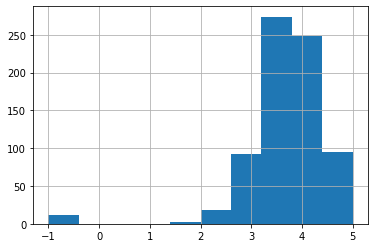

In [43]:
df.Rating.hist()

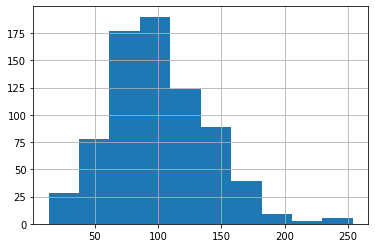

In [44]:
df.avg_salary.hist()

df.boxplot(columns=[])

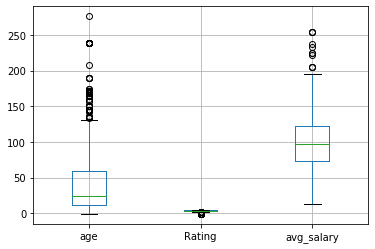

In [46]:
df.boxplot(column=["age","Rating","avg_salary"])

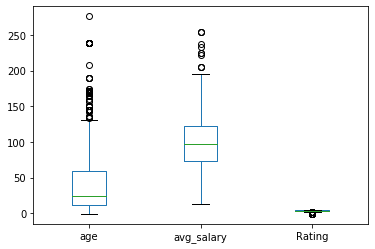

In [45]:
df[['age','avg_salary','Rating']].plot(kind="box")

In [58]:
df.corr()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,same_state,age,python_yn,R_yn,spark,aws,excel,description_len,num_competitiors
Rating,1.000000,0.332927,-0.019531,-0.468234,-0.007825,0.027668,0.013492,0.085033,0.021655,0.144665,-0.004472,0.156982,0.117049,-0.036466,-0.012281,0.027190
Founded,0.332927,1.000000,0.049313,-0.312761,-0.038513,0.001069,-0.015149,0.171512,0.134682,0.103183,0.016045,0.066978,-0.011123,-0.035567,0.083119,0.191265
hourly,-0.019531,0.049313,1.000000,0.124748,-0.309674,-0.379516,-0.356082,-0.067351,0.007626,-0.193487,-0.009505,-0.098530,-0.030315,-0.099897,-0.073194,-0.117265
employer_provided,-0.468234,-0.312761,0.124748,1.000000,0.164277,0.014773,0.076287,-0.081349,-0.109288,-0.107924,-0.007961,-0.082524,-0.000685,0.074129,-0.102218,-0.116665
min_salary,-0.007825,-0.038513,-0.309674,0.164277,1.000000,0.944186,0.980031,-0.045114,0.001705,0.339425,-0.040105,0.171094,0.168418,-0.062074,0.069666,0.086887
max_salary,0.027668,0.001069,-0.379516,0.014773,0.944186,1.000000,0.990833,-0.026738,0.031403,0.312443,-0.039019,0.176259,0.169494,-0.052674,0.083228,0.096386
avg_salary,0.013492,-0.015149,-0.356082,0.076287,0.980031,0.990833,1.000000,-0.034641,0.019655,0.327796,-0.040000,0.176559,0.171379,-0.057252,0.078808,0.093813
same_state,0.085033,0.171512,-0.067351,-0.081349,-0.045114,-0.026738,-0.034641,1.000000,-0.166680,0.006975,-0.058407,-0.053139,-0.065070,0.106026,0.062387,-0.102635
age,0.021655,0.134682,0.007626,-0.109288,0.001705,0.031403,0.019655,-0.166680,1.000000,-0.099160,-0.016533,-0.102788,-0.033081,0.039033,0.163911,0.126687
python_yn,0.144665,0.103183,-0.193487,-0.107924,0.339425,0.312443,0.327796,0.006975,-0.099160,1.000000,0.049124,0.347619,0.203221,-0.021519,0.019143,0.091470


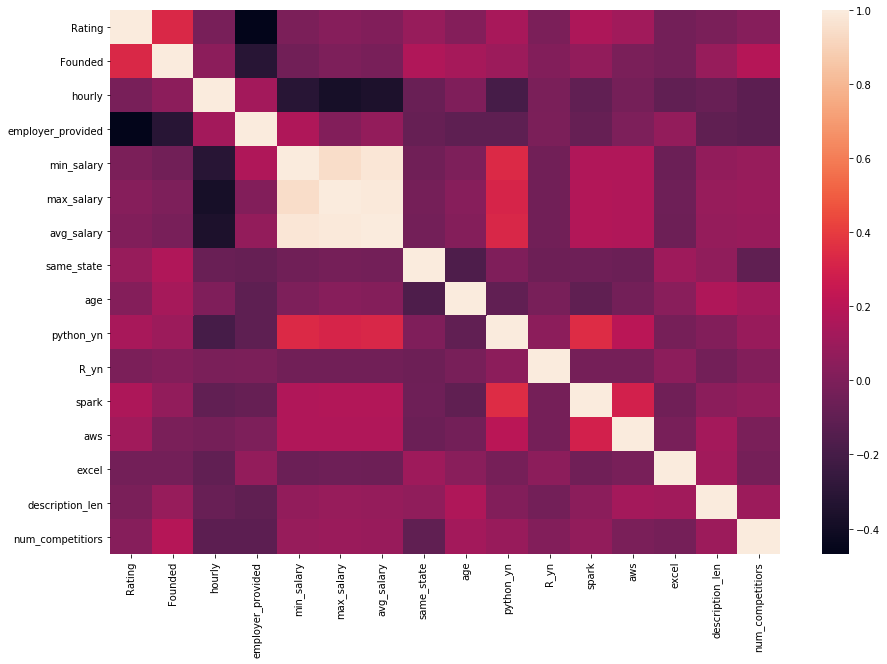

In [50]:
corr=df.corr()#overall correlation
plt.figure(figsize=(15,10))
sns.heatmap(corr)

Top 10 correlation in reggards to average salary

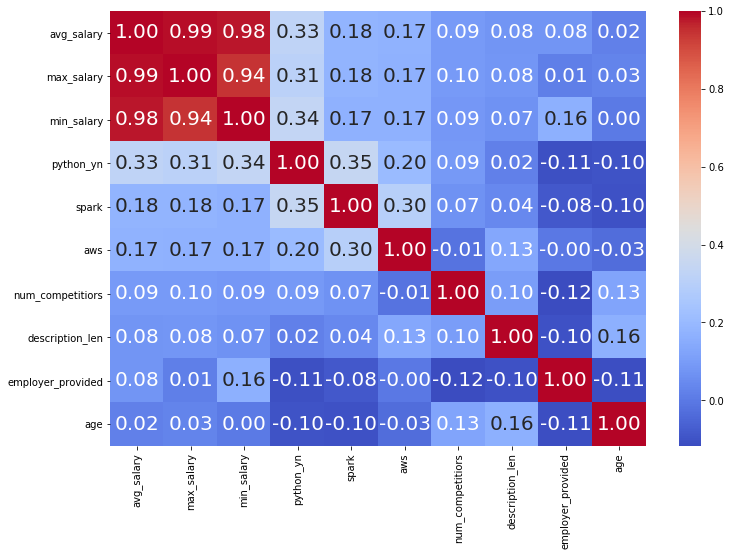

In [56]:
from scipy.stats import norm
cols=corr.nlargest(10,"avg_salary")["avg_salary"].index
cm=np.corrcoef(df[cols].values.T)
cm       
plt.figure(figsize=(12,8))
sns.heatmap(cm,annot=True,cmap="coolwarm",xticklabels=cols.values,yticklabels=cols.values,annot_kws={"size":20},fmt='.2f')


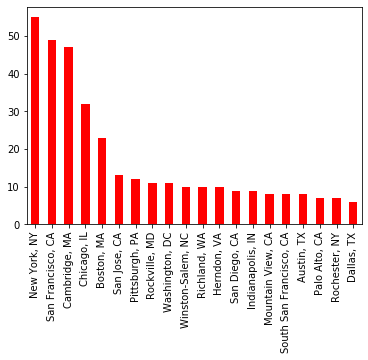

In [59]:
df.Location.value_counts()[:20].plot(kind="bar",color="red"); #the top 20 location of work
plt.xticks();

'Location','Headquarters','company_txt'

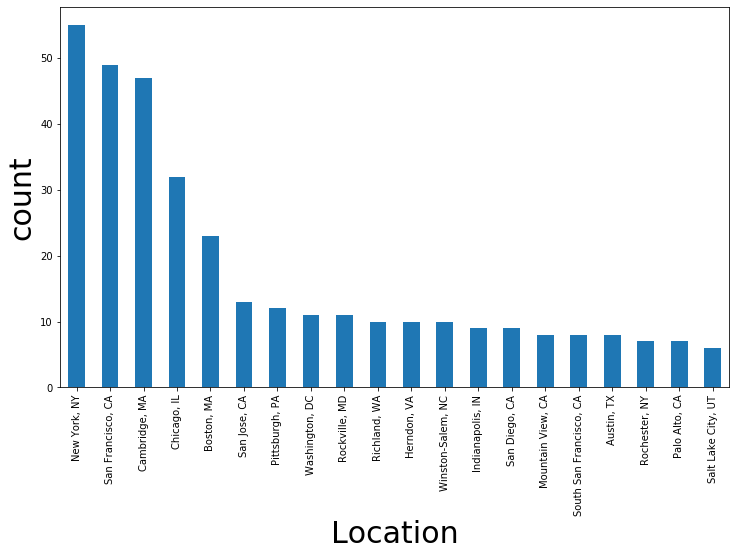

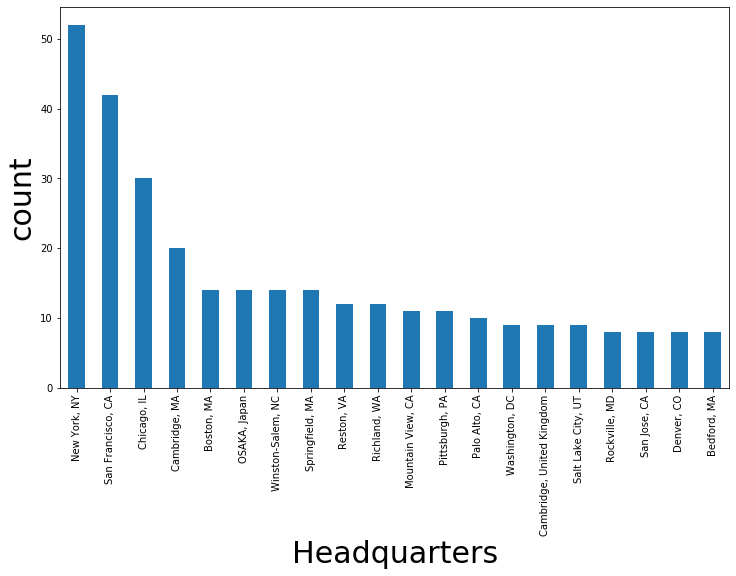

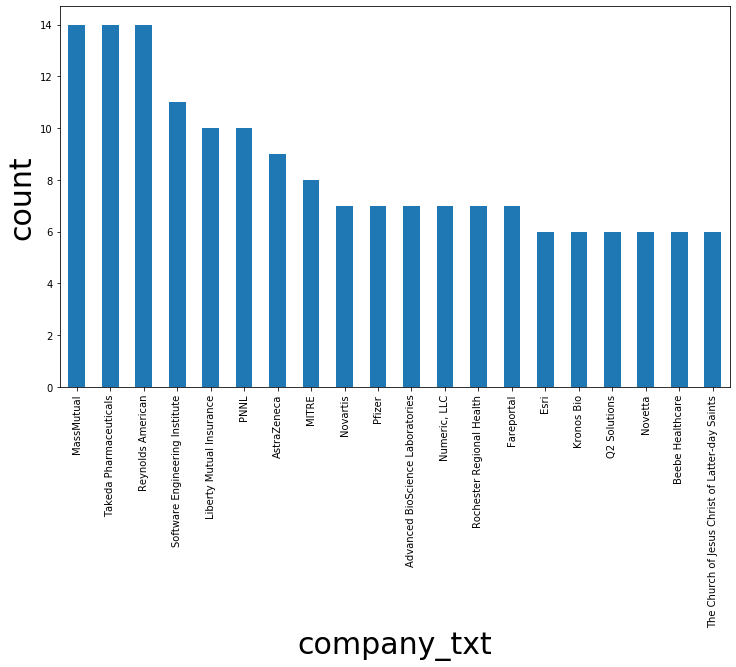

In [78]:
a=['Location','Headquarters','company_txt']
for i in a:
    plt.figure(figsize=(12,7))
    df.groupby(i)[i].count().sort_values(ascending=False)[:20].plot(kind="bar")
    plt.xlabel(i,size=30)
    plt.ylabel("count",size=30)
    plt.show()

In [98]:
pd.pivot_table(df, index = 'job_simp', values = 'avg_salary')

,avg_salary
job_simp,
analyst,65.857843
data engineer,105.403361
data scientist,117.564516
director,168.607143
manager,84.022727
mle,126.431818
na,84.853261


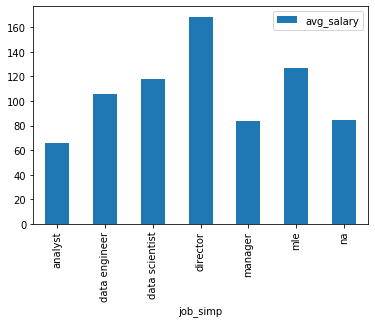

In [105]:
pd.pivot_table(df, index = 'job_simp', values = 'avg_salary').plot.bar()#average salaries based on the Job Profile

In [86]:
pd.pivot_table(df, index = ['job_simp','seniority'], values = 'avg_salary')

avg_salary
job_simp       seniority            
analyst        jr          53.250000
               na          61.308219
               sr          79.092593
data engineer  na          97.493976
               sr         123.638889
data scientist jr         106.500000
               na         110.525510
               sr         134.524390
director       na         168.607143
manager        na          84.022727
mle            na         126.218750
               sr         127.000000
na             na          76.891304
               sr         108.739130

In [87]:
pd.pivot_table(df, index = ['job_state','job_simp'], values = 'avg_salary').sort_values('job_state', ascending = False)

avg_salary
job_state job_simp                  
WI        na               54.000000
          data scientist  113.500000
          analyst          58.833333
WA        na               97.500000
          data scientist   99.764706
          analyst          54.500000
VA        na               79.300000
          mle              87.000000
          data scientist  108.416667
          data engineer    96.900000
          analyst          71.583333
UT        data engineer   100.333333
          analyst          54.750000
          data scientist  140.500000
TX        na               41.285714
          data scientist  100.730769
          data engineer   113.062500
TN        data scientist   96.000000
          data engineer   100.950000
          analyst          13.500000
SC        na               60.500000
RI        analyst         100.000000
PA        manager         109.666667
          data engineer    91.500000
          data scientist  113.333333
          analyst          62.750000
          mle             120.500000
          na               76.062500
OR        data scientist   98.500000
          data engineer    73.000000
OH        na               91.166667
          data scientist  105.285714
          analyst          53.875000
NY        na               81.583333
          mle             125.000000
          data scientist  115.250000
          data engineer    86.375000
          analyst          65.607143
NM        data scientist   74.333333
NJ        data scientist  106.875000
          analyst          83.583333
          data engineer   112.000000
          manager         109.500000
          director        161.500000
          na               82.500000
NE        na               41.000000
NC        na               90.916667
          data scientist  117.000000
          data engineer   104.250000
MO        na               72.333333
          manager          40.500000
          data scientist  127.666667
          analyst          61.000000
MN        data engineer    95.000000
          analyst          76.000000
MI        manager          87.500000
          data scientist  106.625000
MD        na               88.750000
          data scientist  109.115385
          data engineer   109.000000
          analyst          80.666667
MA        na              107.478261
          manager          71.900000
          director        117.833333
          data scientist  113.750000
          data engineer   107.291667
          analyst          59.125000
LA        analyst          48.000000
          data engineer    70.500000
          na               20.000000
KY        na              103.500000
          data scientist   84.000000
KS        mle              87.000000
IN        na               69.000000
          data scientist   84.500000
          data engineer   114.500000
IL        analyst          66.500000
          na               57.166667
          mle             133.000000
          director        221.750000
          data scientist  117.233333
          data engineer    96.125000
ID        analyst          56.250000
IA        analyst          43.000000
          data engineer   102.833333
GA        data scientist   81.333333
          na               80.000000
FL        data scientist   97.357143
          data engineer    91.833333
          analyst          47.500000
DE        na               27.500000
DC        data scientist  149.000000
          data engineer    85.000000
          analyst          63.500000
CT        na               62.500000
          data scientist   84.000000
CO        mle             100.500000
          data engineer    99.000000
          analyst          29.500000
          na               31.500000
          data scientist  108.666667
CA        na               99.907407
          mle             177.300000
          manager          80.611111
          data scientist  142.522059
          data engineer   129.540000
          analyst          85.

In [88]:
pd.pivot_table(df, index = ['job_state','job_simp'], values = 'avg_salary', aggfunc = 'count').sort_values('job_state', ascending = False)

avg_salary
job_state job_simp                  
WI        na                       4
          data scientist           3
          analyst                  3
WA        na                       1
          data scientist          17
          analyst                  3
VA        na                       5
          mle                      2
          data scientist          18
          data engineer           10
          analyst                  6
UT        data engineer            3
          analyst                  4
          data scientist           3
TX        na                       7
          data scientist          13
          data engineer            8
TN        data scientist           1
          data engineer           10
          analyst                  2
SC        na                       1
RI        analyst                  1
PA        manager                  3
          data engineer            1
          data scientist           6
          analyst                  8
          mle                      7
          na                       8
OR        data scientist           3
          data engineer            1
OH        na                       3
          data scientist           7
          analyst                  4
NY        na                      12
          mle                      2
          data scientist          40
          data engineer            4
          analyst                 14
NM        data scientist           3
NJ        data scientist           4
          analyst                  6
          data engineer            2
          manager                  2
          director                 2
          na                       1
NE        na                       4
NC        na                      12
          data scientist           3
          data engineer            6
MO        na                       3
          manager                  1
          data scientist           3
          analyst                  2
MN        data engineer            1
          analyst                  1
MI        manager                  2
          data scientist           4
MD        na                      16
          data scientist          13
          data engineer            3
          analyst                  3
MA        na                      46
          manager                  5
          director                 6
          data scientist          30
          data engineer           12
          analyst                  4
LA        analyst                  1
          data engineer            2
          na                       1
KY        na                       4
          data scientist           2
KS        mle                      3
IN        na                       4
          data scientist           2
          data engineer            4
IL        analyst                  3
          na                       6
          mle                      2
          director                 6
          data scientist          15
          data engineer            8
ID        analyst                  2
IA        analyst                  2
          data engineer            3
GA        data scientist           3
          na                       3
FL        data scientist           7
          data engineer            3
          analyst                  6
DE        na                       6
DC        data scientist           5
          data engineer            4
          analyst                  2
CT        na                       3
          data scientist           2
CO        mle                      1
          data engineer            3
          analyst                  1
          na                       3
          data scientist           3
CA        na                      27
          mle                      5
          manager                  9
          data scientist          68
          data engineer           25
          analyst             

The Data Scientist in different states based on their average salaries in descending order

In [89]:
pd.pivot_table(df[df.job_simp == 'data scientist'], index = 'job_state', values = 'avg_salary').sort_values('avg_salary', ascending = False)

,avg_salary
job_state,
DC,149.000000
CA,142.522059
UT,140.500000
MO,127.666667
IL,117.233333
NC,117.000000
NY,115.250000
MA,113.750000
WI,113.500000


In [92]:
 '''rating, industry, sector, revenue, number of comp, hourly, employer provided, python, r, spark, aws, excel,
 desc_len, Type of onwership
'''
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'num_competitiors', 'hourly', 'employer_provided', 'python_yn'
                , 'R_yn', 'spark', 'aws', 'excel', 'Type of ownership','avg_salary']]
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots,index =i, values = 'avg_salary').sort_values('avg_salary', ascending = False))

Rating
        avg_salary
Rating            
-1.0    136.181818
 5.0    134.700000
 2.5    120.000000
 4.5    117.714286
 4.1    116.368421
 3.9    113.071429
 2.6    109.083333
 4.4    108.606061
 3.2    105.500000
 4.0    105.340426
 3.5    104.897959
 3.7    104.131148
 4.7    103.983871
 4.3    102.468750
 3.3    101.858974
 4.2    100.442308
 2.2     97.750000
 4.6     97.250000
 3.8     96.811475
 2.1     95.900000
 3.4     93.011364
 1.9     87.500000
 3.1     86.580000
 3.0     85.588235
 3.6     85.467391
 2.8     83.928571
 2.7     83.250000
 2.3     81.500000
 2.9     81.138889
 4.8     80.277778
 2.4     60.214286
Industry
                                          avg_salary
Industry                                            
Other Retail Stores                       163.500000
Motion Picture Production & Distribution  146.000000
Financial Analytics & Research            145.125000
Health, Beauty, & Fitness                 139.500000
Telecommunications Services            

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [110]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority', 'description_len',
       'num_competitiors'],
      dtype='object')

In [116]:
pd.pivot_table(df, index = ["Company Name",'Revenue'], columns = 'python_yn', values = 'avg_salary')

,python_yn,0,1
Company Name,Revenue,,
"1-800-FLOWERS.COM, Inc.\n2.8",$1 to $2 billion (USD),NaN,76.500000
1904labs\n4.7,Unknown / Non-Applicable,NaN,143.500000
23andMe\n4.0,Unknown / Non-Applicable,92.000000,NaN
7Park Data\n3.8,Unknown / Non-Applicable,NaN,121.000000
<intent>\n4.6,$100 to $500 million (USD),NaN,140.000000
ALIN,Unknown / Non-Applicable,NaN,110.500000
AVANADE\n3.9,$2 to $5 billion (USD),87.000000,NaN
AXION Healthcare Solutions\n3.6,$10 to $25 million (USD),66.000000,NaN
Acceleron Pharma\n4.4,Unknown / Non-Applicable,140.000000,NaN


In [168]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to C:\Users\Sid
[nltk_data]     Rawat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

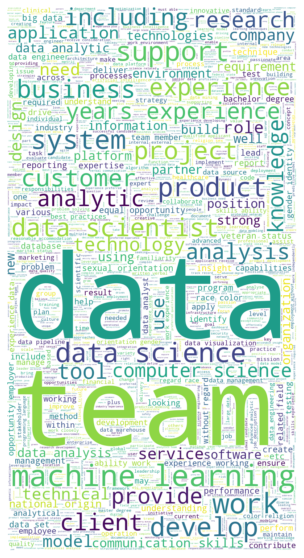

In [179]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white",stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)#random_state=0
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()

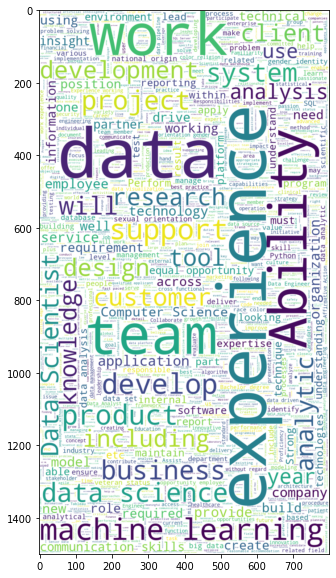

In [177]:
# Start with one review:
text = " ".join(review for review in df["Job Description"])
# Create and generate a word cloud image:
wc= WordCloud(background_color="white",stopwords=STOPWORDS, random_state=1, max_words = 2000, width =800, height = 1500)
wc.generate(text)

# Display the generated image:

plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation='bilinear')
plt.show()